# Data Cleaning

In [1]:
# Import Libraries and Load Dataset
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/prasa/Documents/GENAIVERSITY/MACHINE LEARNING/Datasets/Titanic Dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for Duplicate Rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [3]:
# Identify Column Data Types
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [4]:
# Count Unique Values in the Categorical Columns
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [5]:
# Calculate Missing Values as Percentage
round((df.isnull().sum() / df.shape[0]) * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
# Drop Irrelevant or Data-Heavy Missing Columns
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])

df1 = df1.dropna(subset=['Embarked'])

df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
print(df1)


     PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.642093      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Embarked  
0          S  
1        

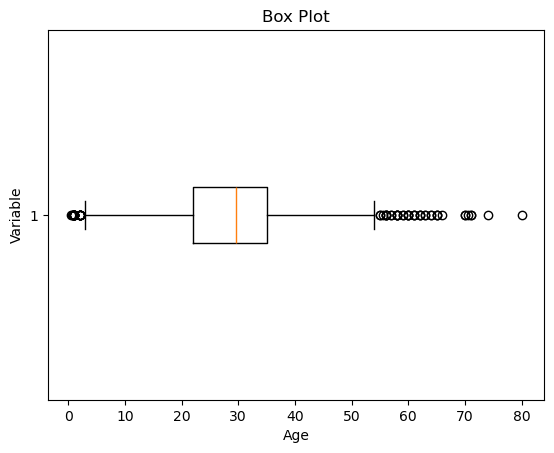

In [14]:
# Detect Outliers with Box Plot
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [16]:
# Calculate Outlier Boundaries and Remove Them
mean = df1['Age'].mean()
std = df1['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]
print(df2)

     PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.642093      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Embarked  
0          S  
1        

In [17]:
# Impute Missing Data Again if Any
df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
# Recalculate Outlier Bounds and Remove Outliers from the Updated Data
mean = df3['Age'].mean()
std = df3['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911


In [19]:
# Data validation and verification
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [21]:
# Data formatting
#  Min-Max Scaling ---->
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X.copy()
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S


In [22]:
# Standardization (Z-score scaling)
from sklearn.preprocessing import StandardScaler

# 1. Create scaler object
scaler = StandardScaler()

# 2. Select numerical columns
num_cols = [col for col in df1.columns if df1[col].dtype != 'object']

# 3. Create a copy (important)
df_scaled = df1.copy()

# 4. Apply standardization
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# 5. View result
df_scaled.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.732505,-0.786961,0.825209,male,-0.589620,0.431350,-0.474326,-0.500240,S
1,-1.728611,1.270711,-1.572211,female,0.644848,0.431350,-0.474326,0.788947,C
2,-1.724718,1.270711,0.825209,female,-0.281003,-0.475199,-0.474326,-0.486650,S
3,-1.720825,1.270711,-1.572211,female,0.413385,0.431350,-0.474326,0.422861,S
4,-1.716931,-0.786961,0.825209,male,0.413385,-0.475199,-0.474326,-0.484133,S
